<a href="https://colab.research.google.com/github/wdwzyyg/ECE532Project/blob/main/Method1_Kernel_based_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import scipy.io as sio

import time
from google.colab import output

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
import pickle
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
feature = np.load('/content/drive/MyDrive/ECE532/Project/Featurization Result/features_Xception.npy')
flattened_features = feature.reshape(*feature.shape[0:1],-1, *feature.shape[3:4]) # -1 means the unknown new axis

# the SVM function cross_val_score need imput <= 2 dimention, so flat all the features for each sample. 
feature_2D = feature.reshape( *feature.shape[0:1],-1)
labels = np.asarray(np.load('/content/drive/MyDrive/ECE532/Project/Featurization Result/raw_y_train.npy'))

## Linear Kernel

In [62]:
# split the training and testing data

test_size = 0.2
(trainData, testData, trainLabels, testLabels) = train_test_split(feature_2D,np.array(labels),test_size=test_size)
print ("Splitted train and test data...")
print ("Train data  : {}".format(trainData.shape))
print ("Test data   : {}".format(testData.shape))
print ("Train labels: {}".format(trainLabels.shape))
print ("Test labels : {}".format(testLabels.shape))

start_time = time.time()

print ("creating model and fit...")
model = svm.SVC(kernel='linear', probability=True, C = 1, class_weight='balanced')
model.fit(trainData, trainLabels)

# dump classifier to file

pickle.dump(model, open('/content/drive/MyDrive/ECE532/Project/Kernel_based SVM result/result.pkl', 'wb'))

# Cross validation
print ("Cross validation...")
scores = cross_val_score(model, trainData, trainLabels, cv=5)
print(scores)

print('Total computing time is: ')
print(int((time.time() - start_time) * 100) / 100.0,'s')

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

Splitted train and test data...
Train data  : (1305, 18432)
Test data   : (327, 18432)
Train labels: (1305,)
Test labels : (327,)
creating model and fit...
Cross validation...
[0.57088123 0.55555556 0.52873563 0.55172414 0.5210728 ]
Total computing time is: 
1141.69 s


Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.51      0.61      0.56       104
           1       0.44      0.42      0.43       114
           2       0.60      0.51      0.55       109

    accuracy                           0.51       327
   macro avg       0.51      0.51      0.51       327
weighted avg       0.51      0.51      0.51       327


Accuracy=0.5107033639143731


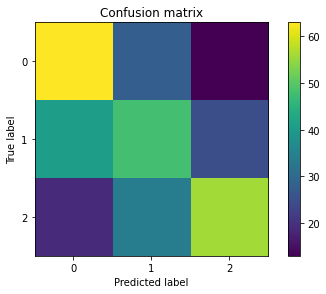

In [84]:
# Model Evaluation

yhat_svm = model.predict(testData)
# print the result
print("Classification report for classifier %s:\n%s\n" % (model, classification_report(testLabels, yhat_svm)))

cm = confusion_matrix(testLabels.tolist(), yhat_svm.tolist())
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
print("Accuracy={}".format(accuracy_score(testLabels, yhat_svm)))


# load a model
# loaded_model = pickle.load(open(filename, 'rb'))

## RBF Kernel

In [ ]:
# Parameter selection
# rf: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_parameters_selection.html

import pylab as pl

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

start_time = time.time()

X, Y = feature_2D, labels

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the trainingset and
# just applying it on the test set.

scaler = StandardScaler()

X = scaler.fit_transform(X)

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = 10. ** np.arange(-3, 6)
gamma_range = 10. ** np.arange(-4, 4)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

grid.fit(X, Y)

print("The best classifier is: ", grid.best_estimator_)

# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

print('Total computing time is: ')
print(int((time.time() - start_time) * 100) / 100.0,'s')

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

In [ ]:
start_time = time.time()

print ("creating model and fit...")
model = svm.SVC(kernel='Gaussian', probability=True, C = 1, class_weight='balanced')
model.fit(feature_2D, labels)

# dump classifier to file

pickle.dump(model, open('/content/drive/MyDrive/ECE532/Project/Kernel_based SVM result/result.pkl', 'wb'))

# Cross validation
print ("Cross validation...")
scores = cross_val_score(model, feature_2D, labels, cv=5)
print(scores)

print('Total computing time is: ')
print(int((time.time() - start_time) * 100) / 100.0,'s')

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

creating model and fit...
saving model...
[0.45259939 0.50764526 0.53067485 0.50306748 0.54907975]
Total computing time is: 
1814.05 s


In [ ]:
# Model Evaluation

yhat_svm = model.predict(feature_2D)
# print the result
print("Classification report for classifier %s:\n%s\n" % (model, classification_report(labels, yhat_svm)))

confusion_matrix = confusion_matrix(labels, yhat_svm)
plot_confusion_matrix_svm(confusion_matrix)
print("Accuracy={}".format(accuracy_score(labels, yhat_svm)))

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

# load a model
# loaded_model = pickle.load(open(filename, 'rb'))